In [34]:
# Update sklearn to prevent version mismatches
# !pip install sklearn --upgrade
# install joblib to save model. 
# !pip install joblib

In [35]:
import pandas as pd
import tensorflow
import numpy as np
import imblearn
print(imblearn.__version__)

0.7.0


In [36]:
import seaborn as sns

In [37]:
df = pd.read_csv("../Resources/cleaned_data.csv")
df

,koi_disposition,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,CONFIRMED,0,0,0,0,54.418383,2.479000e-04,-2.479000e-04,162.513840,0.003520,...,-81,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,FALSE POSITIVE,0,1,0,0,19.899140,1.490000e-05,-1.490000e-05,175.850252,0.000581,...,-176,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
2,FALSE POSITIVE,0,1,0,0,1.736952,2.630000e-07,-2.630000e-07,170.307565,0.000115,...,-174,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
3,CONFIRMED,0,0,0,0,2.525592,3.760000e-06,-3.760000e-06,171.595550,0.001130,...,-211,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509
4,CONFIRMED,0,0,0,0,4.134435,1.050000e-05,-1.050000e-05,172.979370,0.001900,...,-232,4.486,0.054,-0.229,0.972,0.315,-0.105,296.28613,48.224670,15.714
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6986,FALSE POSITIVE,0,0,0,1,8.589871,1.846000e-04,-1.846000e-04,132.016100,0.015700,...,-152,4.296,0.231,-0.189,1.088,0.313,-0.228,298.74921,46.973351,14.478
6987,FALSE POSITIVE,0,1,1,0,0.527699,1.160000e-07,-1.160000e-07,131.705093,0.000170,...,-166,4.529,0.035,-0.196,0.903,0.237,-0.079,297.18875,47.093819,14.082
6988,CANDIDATE,0,0,0,0,1.739849,1.780000e-05,-1.780000e-05,133.001270,0.007690,...,-220,4.444,0.056,-0.224,1.031,0.341,-0.114,286.50937,47.163219,14.757
6989,FALSE POSITIVE,0,0,1,0,0.681402,2.430000e-06,-2.430000e-06,132.181750,0.002850,...,-236,4.447,0.056,-0.224,1.041,0.341,-0.114,294.16489,47.176281,15.385


# Create a Train Test Split

Use `koi_disposition` for the y values

In [38]:
from imblearn.over_sampling import SMOTE
#Oversampling the data
y_raw = df['koi_disposition']
X_raw = df.drop(columns='koi_disposition')
smote = SMOTE(random_state = 1)
X, y = smote.fit_resample(X_raw, y_raw)
#Creating a new Oversampling Data Frame
df_oversampler = pd.DataFrame(X)
df_oversampler

,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,koi_time0bk_err2,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,0,0,0,0,54.418383,2.479000e-04,-2.479000e-04,162.513840,0.003520,-0.003520,...,-81,4.467000,0.064000,-0.096000,0.927000,0.105000,-0.061000,291.934230,48.141651,15.347000
1,0,1,0,0,19.899140,1.490000e-05,-1.490000e-05,175.850252,0.000581,-0.000581,...,-176,4.544000,0.044000,-0.176000,0.868000,0.233000,-0.078000,297.004820,48.134129,15.436000
2,0,1,0,0,1.736952,2.630000e-07,-2.630000e-07,170.307565,0.000115,-0.000115,...,-174,4.564000,0.053000,-0.168000,0.791000,0.201000,-0.067000,285.534610,48.285210,15.597000
3,0,0,0,0,2.525592,3.760000e-06,-3.760000e-06,171.595550,0.001130,-0.001130,...,-211,4.438000,0.070000,-0.210000,1.046000,0.334000,-0.133000,288.754880,48.226200,15.509000
4,0,0,0,0,4.134435,1.050000e-05,-1.050000e-05,172.979370,0.001900,-0.001900,...,-232,4.486000,0.054000,-0.229000,0.972000,0.315000,-0.105000,296.286130,48.224670,15.714000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10507,0,0,0,0,125.275637,5.925329e-04,-5.925329e-04,189.575031,0.003637,-0.003637,...,-106,4.518464,0.043299,-0.075685,0.856497,0.083756,-0.050733,289.265873,42.889956,14.610173
10508,0,0,0,0,18.828869,4.229308e-05,-4.229308e-05,149.994876,0.001921,-0.001921,...,-105,4.456461,0.077310,-0.095414,0.930114,0.114919,-0.086470,284.788773,46.428830,14.107253
10509,0,0,0,0,19.839253,9.454255e-05,-9.454255e-05,147.553725,0.003931,-0.003931,...,-119,4.115264,0.068859,-0.059779,1.591587,0.154227,-0.130664,290.913831,46.829525,12.432530
10510,0,0,0,0,12.943230,1.966610e-05,-1.966610e-05,161.414964,0.002044,-0.002044,...,-103,4.515758,0.077771,-0.031383,0.799402,0.041920,-0.070770,287.970475,48.512110,15.774562


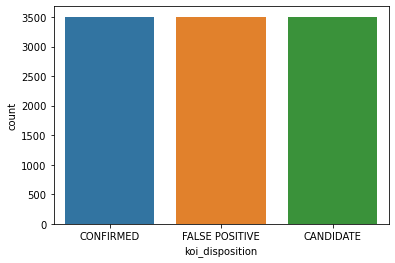

In [39]:
y
sns.countplot(y)

In [40]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1, stratify = y)

In [41]:
X_train.head()

,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,koi_time0bk_err2,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
10044,0,0,0,0,5.870948,0.000069,-0.000069,136.032685,0.005009,-0.005009,...,-124,4.305713,0.088414,-0.079428,1.295495,0.184341,-0.178532,292.081655,44.757560,14.276923
4177,0,0,0,0,13.026796,0.000044,-0.000044,139.147770,0.002540,-0.002540,...,-152,4.512000,0.063000,-0.070000,0.844000,0.083000,-0.074000,297.577120,40.027710,13.336000
1902,0,1,1,0,1.853739,0.000012,-0.000012,132.668850,0.006680,-0.006680,...,0,5.283000,0.000000,0.000000,0.116000,0.000000,0.000000,289.847720,44.185783,12.946000
8065,0,0,0,0,58.306708,0.000943,-0.000943,169.624957,0.012540,-0.012540,...,-189,4.580283,0.039429,-0.137286,0.787289,0.170573,-0.072858,291.866453,45.355029,15.936563
3183,0,0,0,1,5.357451,0.000046,-0.000046,131.627840,0.008850,-0.008850,...,-167,3.982000,0.252000,-0.108000,1.860000,0.383000,-0.527000,298.451230,46.620861,12.596000


# Pre-processing

Scale the data using the MinMaxScaler

In [42]:
from sklearn.preprocessing import MinMaxScaler
X_scaler = MinMaxScaler().fit(X_train)

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

Standardize the data using StandardScaler

In [43]:
from sklearn.preprocessing import StandardScaler

X_train_stand = X_train.copy()
X_test_stand = X_test.copy()

# only numerical features
num_cols = X.columns

# apply standardization on numerical features
for i in num_cols:
    scale = StandardScaler().fit(X_train_stand[[i]])
    X_train_stand[i] = scale.transform(X_train_stand[[i]])
    X_test_stand[i] = scale.transform(X_test_stand[[i]])

# Train the Model

Normalized data

In [44]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter = 1000)


In [45]:
model.fit(X_train_scaled, y_train)
print(f"Training Data Score: {model.score(X_train_scaled, y_train)}")
print(f"Test Data Score: {model.score(X_test_scaled, y_test)}")

Training Data Score: 0.8192541856925418
Test Data Score: 0.8203957382039574


Standardized data

In [46]:
model.fit(X_train_stand, y_train)
print(f"Training Data Score: {model.score(X_train_stand, y_train)}") # 89.17
print(f"Test Data Score: {model.score(X_test_stand, y_test)}") # 88.44

Training Data Score: 0.8669457128361238
Test Data Score: 0.8755707762557078


Standardization produces higher test accuracy than normalization

# Hyperparameter Tuning

Use `GridSearchCV` to tune the model's parameters

In [47]:
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [1, 5, 10],
             'penalty': ["l1", "l2"]}
model = LogisticRegression(solver = 'liblinear')
grid = GridSearchCV(model, param_grid, verbose = 3)

In [48]:
grid.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV] C=1, penalty=l1 .................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ..................... C=1, penalty=l1, score=0.854, total=   1.1s
[CV] C=1, penalty=l1 .................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.1s remaining:    0.0s


[CV] ..................... C=1, penalty=l1, score=0.843, total=   1.2s
[CV] C=1, penalty=l1 .................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    2.3s remaining:    0.0s


[CV] ..................... C=1, penalty=l1, score=0.851, total=   1.3s
[CV] C=1, penalty=l1 .................................................
[CV] ..................... C=1, penalty=l1, score=0.844, total=   1.2s
[CV] C=1, penalty=l1 .................................................
[CV] ..................... C=1, penalty=l1, score=0.845, total=   1.2s
[CV] C=1, penalty=l2 .................................................
[CV] ..................... C=1, penalty=l2, score=0.797, total=   0.1s
[CV] C=1, penalty=l2 .................................................
[CV] ..................... C=1, penalty=l2, score=0.790, total=   0.1s
[CV] C=1, penalty=l2 .................................................
[CV] ..................... C=1, penalty=l2, score=0.807, total=   0.1s
[CV] C=1, penalty=l2 .................................................
[CV] ..................... C=1, penalty=l2, score=0.800, total=   0.1s
[CV] C=1, penalty=l2 .................................................
[CV] .

[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:  3.3min finished
/Users/jiaping/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


GridSearchCV(estimator=LogisticRegression(solver='liblinear'),
             param_grid={'C': [1, 5, 10], 'penalty': ['l1', 'l2']}, verbose=3)

In [49]:
print(grid.best_params_)
print(grid.best_score_)

{'C': 10, 'penalty': 'l1'}
0.8557834061332157


In [50]:
predictions1 = grid.predict(X_test_scaled)
print('Test Acc: %.3f' % grid.score(X_test_scaled, y_test)) # 0.881

Test Acc: 0.870


In [51]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions1))

                precision    recall  f1-score   support

     CANDIDATE       0.85      0.75      0.80       876
     CONFIRMED       0.78      0.87      0.82       876
FALSE POSITIVE       0.98      1.00      0.99       876

      accuracy                           0.87      2628
     macro avg       0.87      0.87      0.87      2628
  weighted avg       0.87      0.87      0.87      2628



After tuning the model using grid search, the logistic regression model accuracy is inceased from 85% to 88%

Standardized data

In [52]:
grid.fit(X_train_stand, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV] C=1, penalty=l1 .................................................
[CV] ..................... C=1, penalty=l1, score=0.859, total=   5.4s
[CV] C=1, penalty=l1 .................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    5.4s remaining:    0.0s


[CV] ..................... C=1, penalty=l1, score=0.853, total=   1.1s
[CV] C=1, penalty=l1 .................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    6.4s remaining:    0.0s


[CV] ..................... C=1, penalty=l1, score=0.857, total=   2.1s
[CV] C=1, penalty=l1 .................................................
[CV] ..................... C=1, penalty=l1, score=0.859, total=   3.0s
[CV] C=1, penalty=l1 .................................................
[CV] ..................... C=1, penalty=l1, score=0.848, total=   2.8s
[CV] C=1, penalty=l2 .................................................
[CV] ..................... C=1, penalty=l2, score=0.864, total=   0.4s
[CV] C=1, penalty=l2 .................................................
[CV] ..................... C=1, penalty=l2, score=0.852, total=   0.4s
[CV] C=1, penalty=l2 .................................................
[CV] ..................... C=1, penalty=l2, score=0.852, total=   0.3s
[CV] C=1, penalty=l2 .................................................
[CV] ..................... C=1, penalty=l2, score=0.859, total=   0.3s
[CV] C=1, penalty=l2 .................................................
[CV] .

[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:  1.2min finished


GridSearchCV(estimator=LogisticRegression(solver='liblinear'),
             param_grid={'C': [1, 5, 10], 'penalty': ['l1', 'l2']}, verbose=3)

In [53]:
print(grid.best_params_)
print(grid.best_score_) # 88.4%

{'C': 10, 'penalty': 'l1'}
0.8580660606626346


In [54]:
predictions2 = grid.predict(X_test_stand)
print('Test Acc: %.3f' % grid.score(X_test_stand, y_test)) # 88.1%

Test Acc: 0.874


In [55]:
print(classification_report(y_test, predictions2))

                precision    recall  f1-score   support

     CANDIDATE       0.86      0.75      0.80       876
     CONFIRMED       0.79      0.87      0.83       876
FALSE POSITIVE       0.98      1.00      0.99       876

      accuracy                           0.87      2628
     macro avg       0.88      0.87      0.87      2628
  weighted avg       0.88      0.87      0.87      2628



Based on the training set cross validation results, the tuned model with standardized data (CV=88.4%) performs slightly better than the tuned model with normalized data (CV=88.1%). As for the final test set accuracy, they have same performance. 

In [56]:
import joblib
filename = 'logistic.sav'
joblib.dump(grid, filename)

['logistic.sav']

## Make Predictions

Predictions from the tuned model with normalized data

In [57]:
prediction1_df = pd.DataFrame({"Actual": y_test, "Predicted":predictions1})
prediction1_df.head(20)

,Actual,Predicted
171,CONFIRMED,CONFIRMED
4595,FALSE POSITIVE,FALSE POSITIVE
1027,CANDIDATE,CONFIRMED
3087,CANDIDATE,CANDIDATE
3534,FALSE POSITIVE,FALSE POSITIVE
528,CONFIRMED,CONFIRMED
8314,CANDIDATE,CANDIDATE
8512,CANDIDATE,CANDIDATE
2744,CANDIDATE,CANDIDATE
8236,CANDIDATE,CONFIRMED


In [58]:
prediction1_df['match'] = np.where(prediction1_df['Predicted'] == prediction1_df['Actual'], 1, 0)
print(f"The number of total predictions: {len(prediction1_df)}")
print(f"The number of correct predictions: {sum(prediction1_df['match'])}")
print(f"The test test accuracy: {round(sum(prediction1_df['match'])/len(prediction1_df)*100,2)}%")
prediction1_df[prediction1_df['match']==0].index

The number of total predictions: 2628
The number of correct predictions: 2286
The test test accuracy: 86.99%


Int64Index([1027, 8236, 8286, 9190, 3602, 4558, 8041, 8132, 8472, 3327,
            ...
            8074, 7078, 7930, 9091, 2074, 9531, 3397, 8652, 9441, 1768],
           dtype='int64', length=342)

Predictions from the tuned model with standardized data

In [59]:
prediction2_df = pd.DataFrame({"Actual": y_test, "Predicted":predictions2})
prediction2_df.head(20)

,Actual,Predicted
171,CONFIRMED,CONFIRMED
4595,FALSE POSITIVE,FALSE POSITIVE
1027,CANDIDATE,CONFIRMED
3087,CANDIDATE,CANDIDATE
3534,FALSE POSITIVE,FALSE POSITIVE
528,CONFIRMED,CONFIRMED
8314,CANDIDATE,CANDIDATE
8512,CANDIDATE,CANDIDATE
2744,CANDIDATE,CANDIDATE
8236,CANDIDATE,CONFIRMED


In [60]:
prediction2_df['match'] = np.where(prediction2_df['Predicted'] == prediction2_df['Actual'], 1, 0)
print(f"The number of total predictions: {len(prediction2_df)}")
print(f"The number of correct predictions: {sum(prediction2_df['match'])}")
print(f"The test test accuracy: {round(sum(prediction2_df['match'])/len(prediction2_df)*100,2)}%")
prediction2_df[prediction2_df['match']==0].index

The number of total predictions: 2628
The number of correct predictions: 2297
The test test accuracy: 87.4%


Int64Index([1027, 8236, 8286, 9190, 3602, 4558, 8041, 8132, 8472, 3327,
            ...
            4962, 8074, 7078, 9091, 2074, 3397, 8652, 9969, 9441, 1768],
           dtype='int64', length=331)

The final accuracy results are consistent with the model scores obtained from the last section.